### The Trigonometric Functions 

$$\sin x = \sum_{k=0}^{\infty} \frac{(-1)^n}{(2n + 1)!}x^{(2n+1)} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \dots$$
<br>
$$\cos x = \sum_{k=0}^{\infty} \frac{(-1)^n}{(2n)!}x^{(2n)} = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + \dots$$

From the exponential function another kind of optimization can be performed on the trignometric series. 

![title](img/Trigo.png)

________________________

#### The Cosine Function
<br>
$$\cos x = \sum_{k=0}^{\infty} \frac{(-1)^n}{(2n)!}x^{(2n)} = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + \dots$$


Lets take a look at how the series looks before deciding a terminating condition. 

In [130]:
#The utils file contains all the generic functions required for testing, finding computation time and plotting various graphs
import utils
import numpy as np
import math
import matplotlib.pyplot as plt
import statistics
import timeit
import copy
plt.style.use('seaborn-darkgrid')

In [131]:
def terms_cos(x, i):
    return (-1)**i*x**(2*i)/math.factorial(2*i)

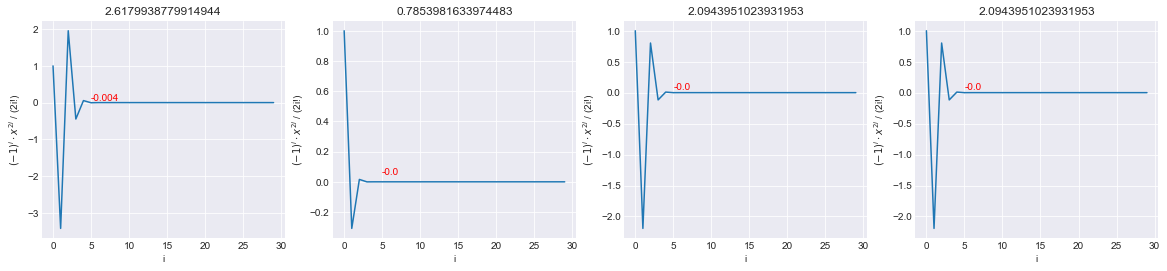

In [132]:
utils.plot_term([np.pi/1.2, np.pi/4, np.pi/1.5, 2*np.pi/3], terms_cos, "$(-1)^i\cdot x^{2i}$ / (2i!)")

The values are oscillating between positive and negative that's because of $-1 ^ i$. The values in red are the $5^{th}$ term rounded off till the third decimal they are not necessarily zero.
<p>I'll be using the same terminating condition I was using for exponential function. I will stop the loop once the value of the series stops changing.

In [133]:
def cos(x) :
    t1 = 1
    t2 = 0
    cosx = 1
    sign = -1
    i = 1
    term = 1
    while t1 != t2:
        term = (sign**i)*(x**(2*i))/math.factorial(2*i)
        cosx += term
        i += 1
        t2 = t1
        t1 = cosx
    return cosx,i

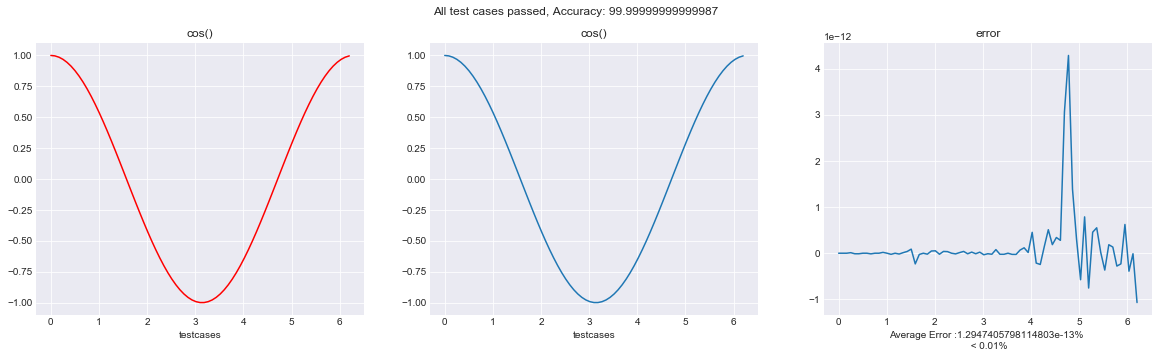

In [134]:
utils.theSeenAndTheUnseenTest(cos, math.cos, np.linspace(0, 2*np.pi, num = 75
                        , endpoint = False))

Instead of finding $(-1)^n$ I could just do i = i + 2 and alternate the sign to find the cos value. 

In [135]:
def cosine_naive(x):
    cosx = 1
    t1 = 1
    t2 = 0
    sign = -1
    i = 2
    term = 1
    while t1 != t2:
        cosx = cosx + (sign*(x**i))/math.factorial(i)
        sign = -sign
        i = i + 2
        t2 = t1
        t1 = cosx
#         if t1 == cosx :
#             break
#         t1 = cosx
    return cosx, i /2

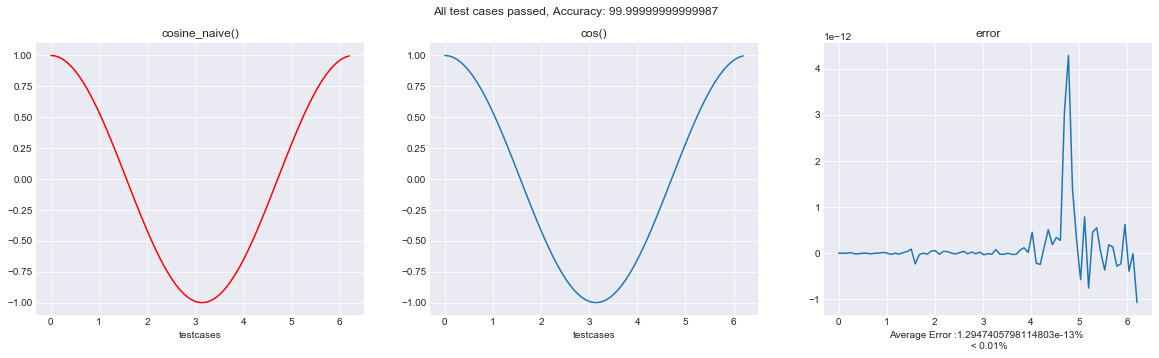

In [136]:
utils.theSeenAndTheUnseenTest(cosine_naive, math.cos, np.linspace(0, 2*np.pi, num = 75, endpoint = False))

Similarly naive implementation for finding $\sin x$


$$\sin x = \sum_{k=0}^{\infty} \frac{(-1)^n}{(2n + 1)!}x^{(2n+1)} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \dots$$

In [137]:
def sin(x):
    sine = 0
    i = 1
    t1 = 1
    t2 = 0
    sign = -1
    while t1 != t2:
        sign = -sign
        sine = sine + sign*(x**i)/math.factorial(i)
        i += 2
        t2 = t1
        t1 = sine
    return sine, int(i/2)

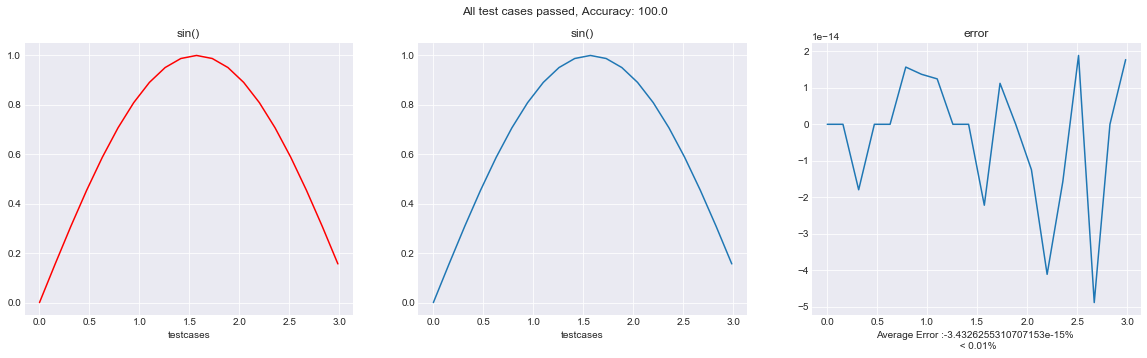

In [138]:
utils.theSeenAndTheUnseenTest(sin, math.sin, np.linspace(0, math.pi, num = 20, endpoint = False))

________________________

The sine and cosine functions are basically the same, the sine function consists of all the odd powered terms and cosine consists of all the even powered terms. Sine and Cosine can be calculated using one function alone.
### Here is a function that calculates both sine and cosine 
Using the indicator i = 0 for cosine and i = 1 for sine

In [139]:
# i = 0 == cos
# i = 1 == sin
def cal_sine_cosine(x,i) :
    t2 = t1 = val = 0
    sign = 1
    fact = 1
    sq = x*x
    n = 0
    
    #initialising to the first according to sine or cos
    if i == 0:
        i = 2
        val = 1
        t1 = term = 1
    if i == 1:
        t2 = term = val = x
        i = 3
    
    while t1 != t2:
        sign  = -sign
        val = val + ((x**(i))/math.factorial(i))*sign
        i = i + 2
        t2 = t1
        t1 = val
    return val, i/2

In [140]:
def find_cos(x) :
    return cal_sine_cosine(x,0)
    
def find_sin(x) :
    return cal_sine_cosine(x,1)

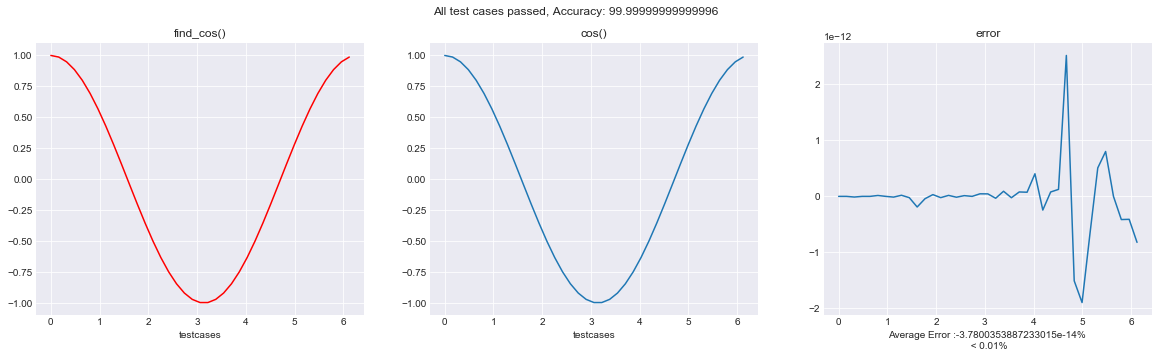

In [141]:
utils.theSeenAndTheUnseenTest(find_cos, math.cos, np.linspace(0, 2*math.pi, num = 39, endpoint = False))

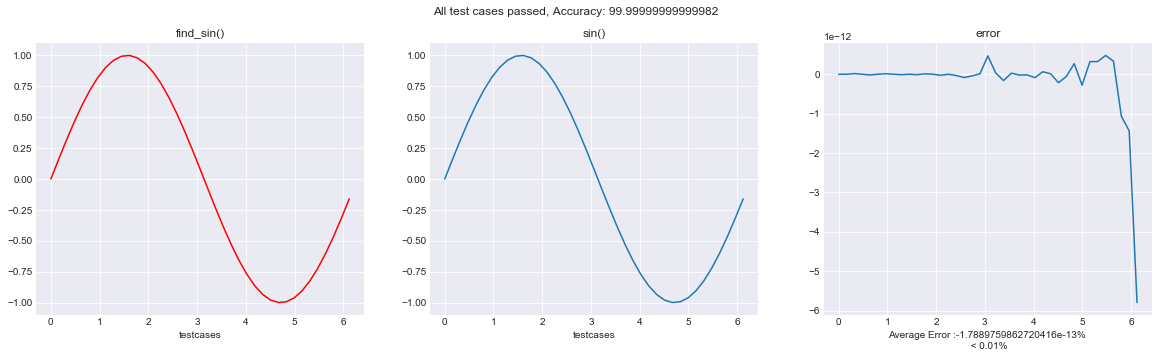

In [142]:
utils.theSeenAndTheUnseenTest(find_sin, math.sin, np.linspace(0, 2*math.pi, num = 39, endpoint = False))

The naive implementation is done. Before checking the runtime of naive implementation I want to look at the values of the series at every iterations and how it deviates form the actual value of the trigonometric function.

In [143]:
def cal_sine_cosine_plot(x,i) :
    '''
    returns a third parameter containing value of series at every iteration
    '''
    t1 = val = 0
    sign = -1
    series_value = []
    while True:
        sign  = -sign
        val = val + ((x**(i))/math.factorial(i))*sign
        series_value.append(val)
        i = i + 2
        if t1 == val :
            break
        t1 = val
    return val, i/2, series_value

def plot_series(function1, function2, x, i):
    fig, ax = plt.subplots(1, 1, figsize = (6,6))
    
    actual = function2(x)
    tup = function1(x, i)
    
    deviation = []
    for i in tup[2]:
        deviation.append(actual - i)
    
    ax.plot(tup[2])
    ax.plot(deviation)
    ax.set_xlabel("iterations")
    ax.legend([function1.__name__ + "'s series at every iteration", "Deviation from "+function2.__name__+"(x)"])

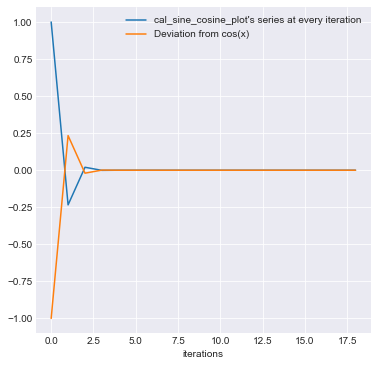

In [144]:
plot_series(cal_sine_cosine_plot, math.cos, np.pi/2, 0)

In [145]:
cosnaive_time = utils.find_time(np.linspace(0, 2*math.pi, num = 39, endpoint = False), find_cos)
sinnaive_time = utils.find_time(np.linspace(0, 2*math.pi, num = 39, endpoint = False), find_sin)

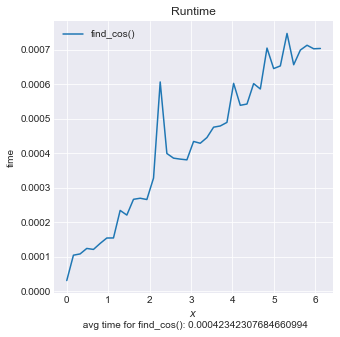

In [146]:
utils.plot_time(np.linspace(0, 2*math.pi, num = 39, endpoint = False), True, first = (cosnaive_time, find_cos))

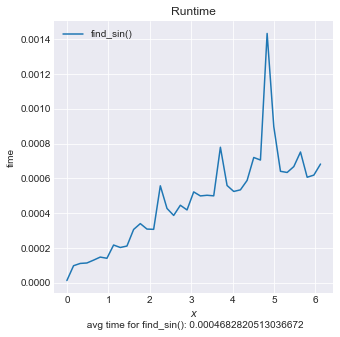

In [147]:
utils.plot_time(np.linspace(0, 2*math.pi, num = 39, endpoint = False), True, first = (sinnaive_time, find_sin))

| Optimization | Geometric Series   | Speed Up | Exponential | Speedup | Cosine | Speedup | Sine | Speedup|
|------|------|------|------|------|------|------|------|------|
|   Naive  |$13 ms$| - |$1.9ms$| - | $0.5ms$ | - | $0.4ms$ | - |
| Iterations | $100\mu s$ | $100\times$|$0.62ms$|$3\times$|
| Calculating Power | $5.9 ms$ | $2\times$|$2ms$ | $1\times$|
| Calculating Factorial | - | - | $0.4ms$ | $1\times$|
| Calculation | - | - | $0.4ms$ | $4\times$|
|All optimzations| $61 \mu s$|$200 \times$| $0.12ms$ | $14\times$|

_____________
## 2. Iteration optimization

![title](img/trig_iterations.png)

In [148]:
# i = 0 == cos
# i = 1 == sin
def cal_sine_cosine_iterations(x,i) :
    t1 = val = 0
    error_per = 1
    sign = -1
    
    if i == 0:
        actual = math.cos(x)
    else:
        actual = math.sin(x)
    
    #while t1 != t2:
    while error_per > 0.01:
        sign  = -sign
        val = val + ((x**(i))/math.factorial(i))*sign
        i = i + 2
        error_per = abs((val - actual)/actual)*100
    return val, i/2


def find_cos_iterations(x) : 
    return cal_sine_cosine_iterations(x,0)
def find_sin_iterations(x) :
    return cal_sine_cosine_iterations(x,1)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


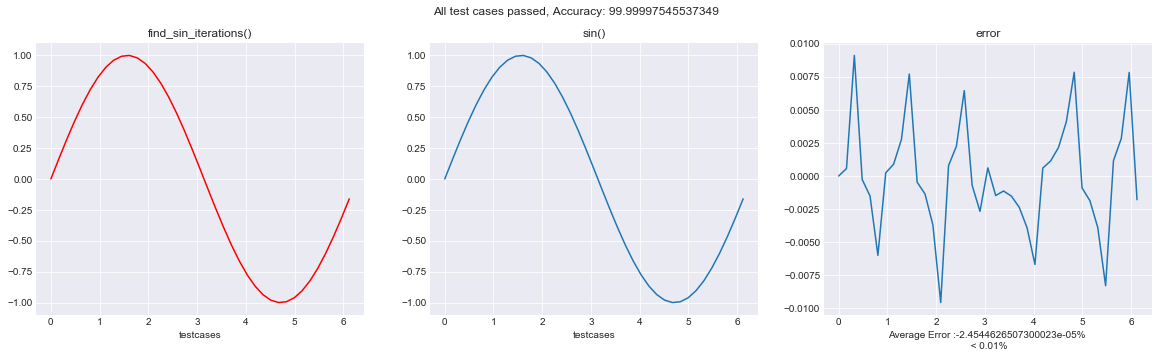

In [149]:
utils.theSeenAndTheUnseenTest(find_sin_iterations, math.sin, np.linspace(0, 2*math.pi, num = 39, endpoint = False))

See the runtime warning "invalid value encountered in double_scalars" thats because of division by zero. Values such as $cos \frac {\pi}{2}$, $sin \pi$ are $0$ and when I am calculating error with respect to these values I tend to divide by zero. For such cases I will keep the old terminating condition. 

In [150]:
# i = 0 == cos
# i = 1 == sin
def cal_sine_cosine_iterations(x,i) :
    t1 = val = 0
    error_per = 1
    sign = -1
    
    if i == 0:
        actual = math.cos(x)
    else:
        actual = math.sin(x)
    
    #while t1 != t2:
    while error_per > 0.01:
        sign  = -sign
        val = val + ((x**(i))/math.factorial(i))*sign
        i = i + 2
        if actual != 0:            
            error_per = abs((val - actual)/actual)*100
        else:
            if t1 == val :
                break
        t1 = val
    return val, i/2


def find_cos_iterations(x) : 
    return cal_sine_cosine_iterations(x,0)
def find_sin_iterations(x) :
    return cal_sine_cosine_iterations(x,1)

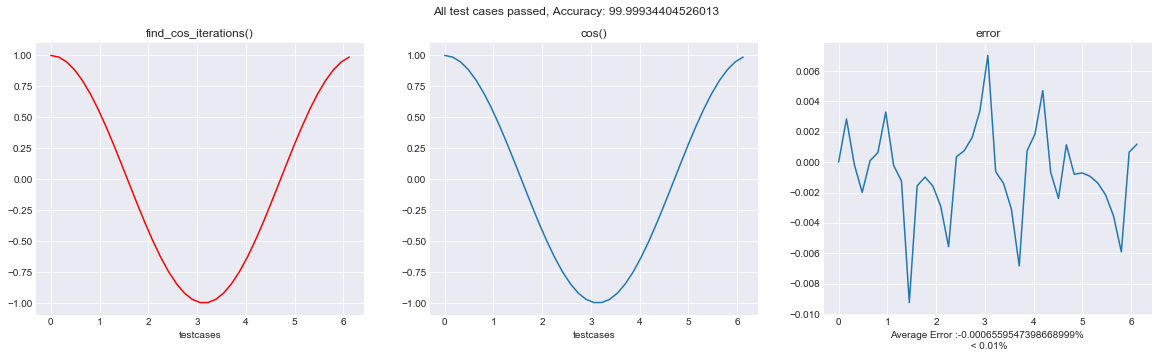

In [151]:
utils.theSeenAndTheUnseenTest(find_cos_iterations, math.cos, np.linspace(0, 2*math.pi, num = 39, endpoint = False))

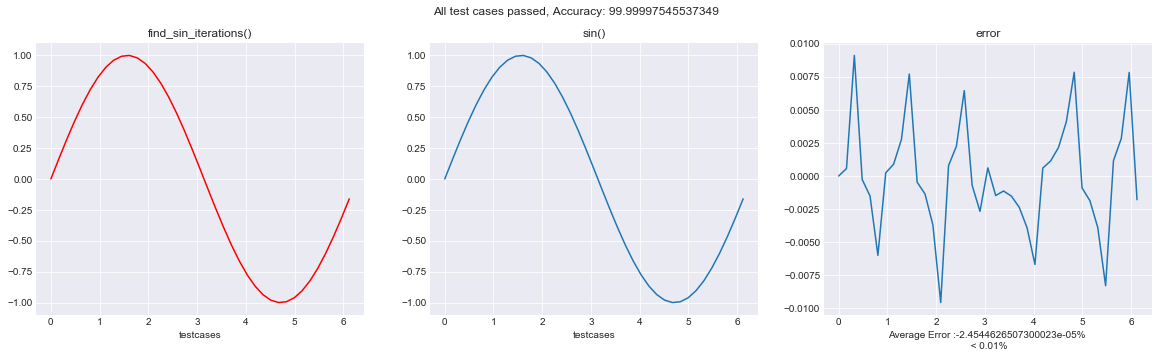

In [152]:
utils.theSeenAndTheUnseenTest(find_sin_iterations, math.sin, np.linspace(0, 2*math.pi, num = 39, endpoint = False))

Now I can check the runtime for this function but before that let me see what is the effect on number of iteration by using ```compare_functions()```. 

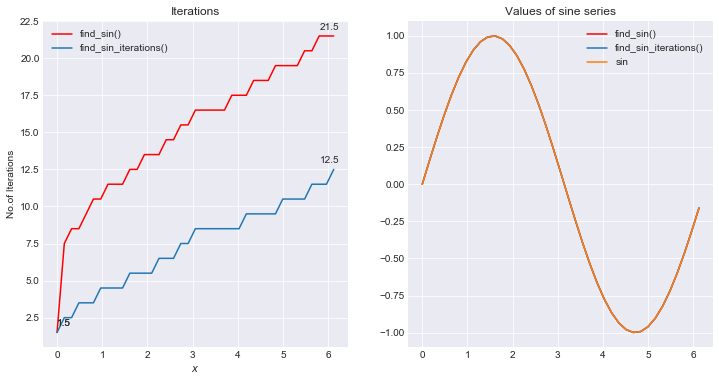

In [153]:
utils.compare_functions(find_sin,find_sin_iterations,math.sin,"sine series", np.linspace(0, np.pi*2, num = 39, endpoint = False))

The iterations have dropped to almost of half of what they were in the naive implementation. I am expecting an average speedup near to $2\times$

In [154]:
cositerations_time = utils.find_time(np.linspace(0, np.pi*2, num = 39, endpoint = False), find_cos_iterations)
siniterations_time = utils.find_time(np.linspace(0, np.pi*2, num = 39, endpoint = False), find_sin_iterations)

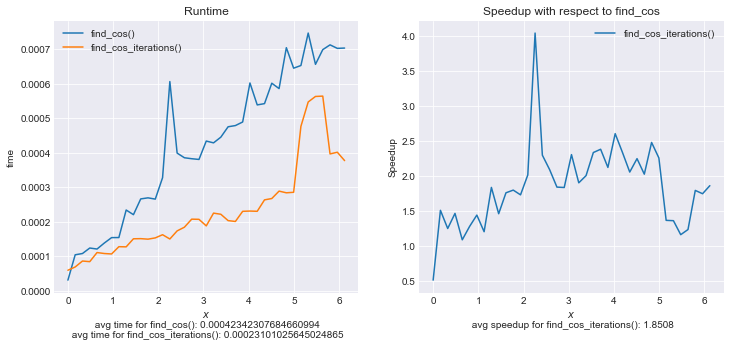

In [155]:
utils.plot_time(np.linspace(0, np.pi*2, num = 39, endpoint = False), True, first = (cosnaive_time, find_cos),
          second = (cositerations_time, find_cos_iterations)
         )

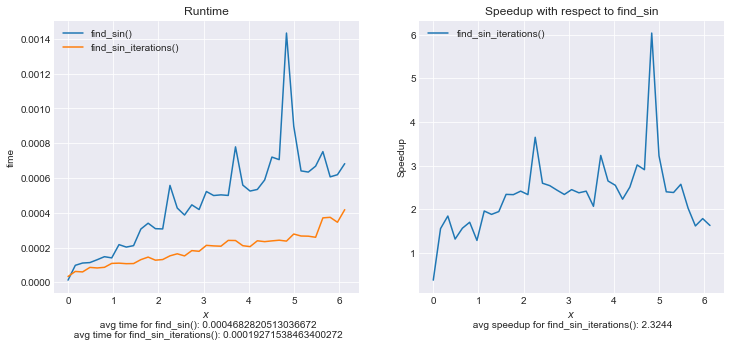

In [156]:
utils.plot_time(np.linspace(0, np.pi*2, num = 39, endpoint = False), True, first = (sinnaive_time, find_sin),
          second = (siniterations_time, find_sin_iterations)
         )

| Optimization | Geometric Series   | Speed Up | Exponential | Speedup | Cosine | Speedup | Sine | Speedup|
|------|------|------|------|------|------|------|------|------|
|   Naive  |$13 ms$| - |$1.9ms$| - | $0.5ms$ | - | $0.4ms$ | - |
| Iterations | $100\mu s$ | $100\times$|$0.62ms$|$3\times$| $0.1ms$ | $3\times$ | $0.1ms$ | $3\times$
| Calculating Power | $5.9 ms$ | $2\times$|$2ms$ | $1\times$|
| Calculating Factorial | - | - | $0.4ms$ | $1\times$|
| Calculation | - | - | $0.4ms$ | $4\times$|
|All optimzations| $61 \mu s$|$200 \times$| $0.12ms$ | $14\times$|

____________


## 2. Power Optimization 

![title](img/trig_pow.png)

In [157]:
def cal_sine_cosine_power(x,i) :
    t2 = t1 = val = 0
    sign = 1
    fact = 1
    sq = x*x
    n = 0
    
    #initialising to the first according to sine or cos
    if i == 0:
        i = 2
        val = 1
        t1 = term = 1
    if i == 1:
        t2 = term = val = x
        i = 3
    
    while t1 != t2:
        term = term*sq
        sign  = -sign
        val = val + (term/math.factorial(i))*sign
        i = i + 2
        t2 = t1
        t1 = val
    return val, int(i/2)

def find_cos_power(x) : 
    return cal_sine_cosine_power(x,0)
def find_sin_power(x) :
    return cal_sine_cosine_power(x,1)

Let's test the optimized function

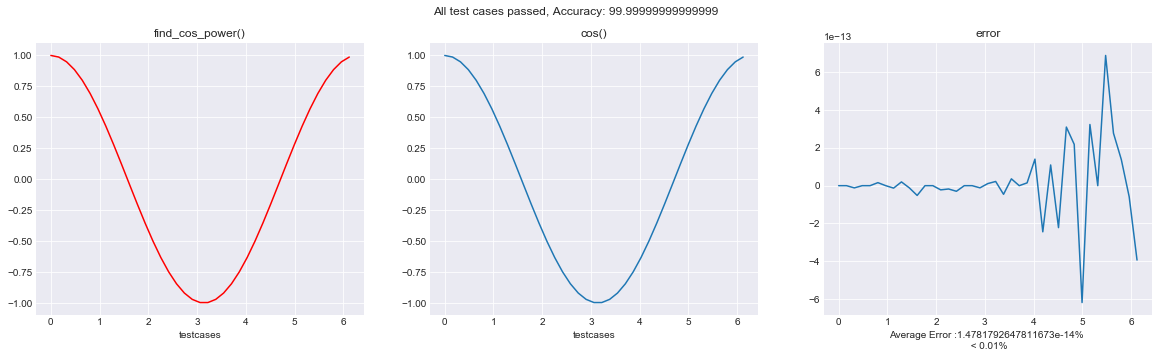

In [158]:
utils.theSeenAndTheUnseenTest(find_cos_power, math.cos, np.linspace(0, np.pi*2, 39, False))

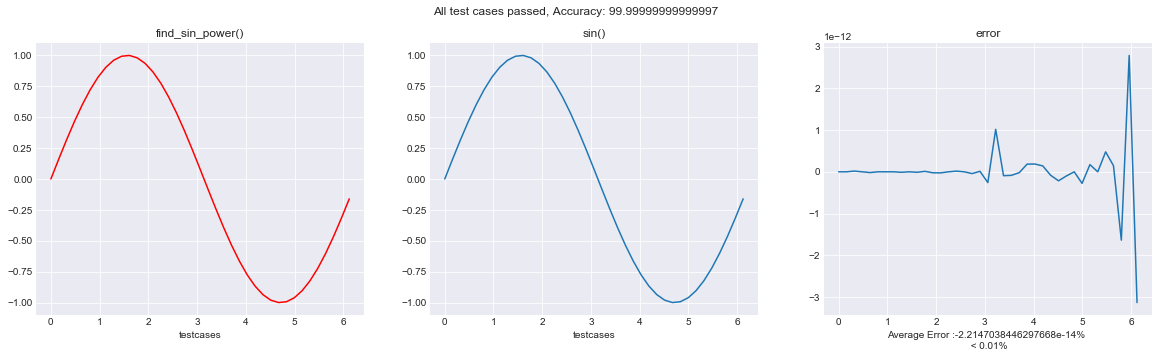

In [159]:
utils.theSeenAndTheUnseenTest( find_sin_power, math.sin, np.linspace(0, np.pi*2, 39, False))

In [160]:
cospower_time = utils.find_time(np.linspace(0, np.pi*2, num = 39, endpoint = False), find_cos_power)
sinpower_time = utils.find_time(np.linspace(0, np.pi*2, num = 39, endpoint = False), find_sin_power)

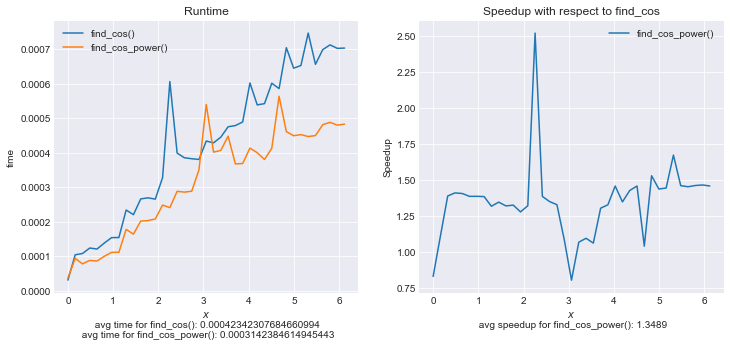

In [161]:
utils.plot_time(np.linspace(0, np.pi*2, num = 39, endpoint = False), True, first = (cosnaive_time, find_cos),
          second = (cospower_time, find_cos_power)
         )

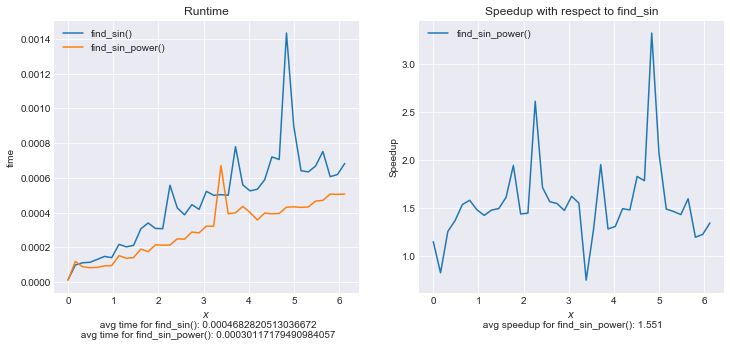

In [162]:
utils.plot_time(np.linspace(0, np.pi*2, num = 39, endpoint = False), True, first = (sinnaive_time, find_sin),
          second = (sinpower_time, find_sin_power))

| Optimization | Geometric Series   | Speed Up | Exponential | Speedup | Cosine | Speedup | Sine | Speedup|
|------|------|------|------|------|------|------|------|------|
|   Naive  |$13 ms$| - |$1.9ms$| - | $0.5ms$ | - | $0.4ms$ | - |
| Iterations | $100\mu s$ | $100\times$|$0.62ms$|$3\times$| $0.1ms$ | $3\times$ | $0.1ms$ | $3\times$ |
| Calculating Power | $5.9 ms$ | $2\times$|$2ms$ | $1\times$| $0.4ms$ | $1\times$ | $0.3ms$ | $1\times$|
| Calculating Factorial | - | - | $0.4ms$ | $1\times$|
| Calculation | - | - | $0.4ms$ | $4\times$|
|All optimzations| $61 \mu s$|$200 \times$| $0.12ms$ | $14\times$|

______________________
## 3. Factorial Optimization

![title](img/trig_factorial_func.png)

In [163]:
def cal_sine_cosine_factorial(x,i) :
    t2 = t1 = val = 0
    sign = 1
    fact = 1
    sq = x*x
    n = 0
    
    #initialising to the first according to sine or cos
    if i == 0:
        i = 2
        val = 1
        t1 = term = 1
    if i == 1:
        t2 = term = val = x
        i = 3
    
    while t1 != t2:
        term = term*sq
        sign  = -sign
        val = val + (term/math.factorial(i))*sign
        i = i + 2
        t2 = t1
        t1 = val
    return val,int(i/2)

def find_cos_factorial(x) : 
    return cal_sine_cosine_factorial(x,0)
def find_sin_factorial(x) :
    return cal_sine_cosine_factorial(x,1)

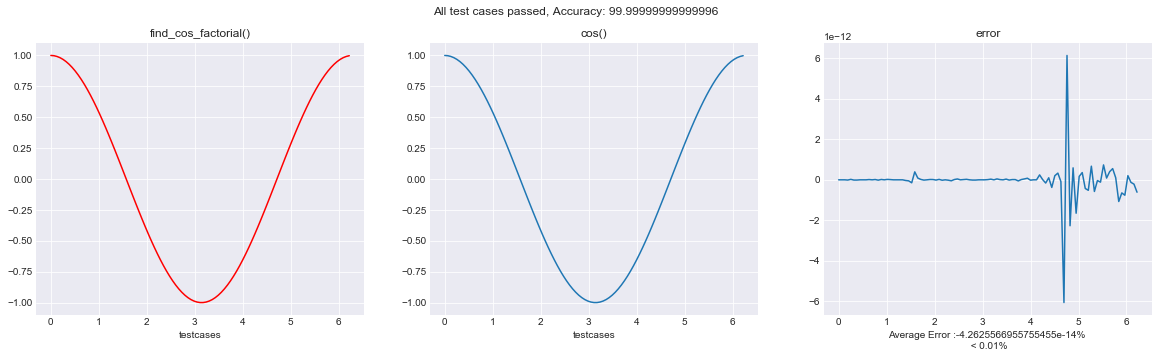

In [164]:
utils.theSeenAndTheUnseenTest( find_cos_factorial, math.cos, np.linspace(0, np.pi*2, 99, False))

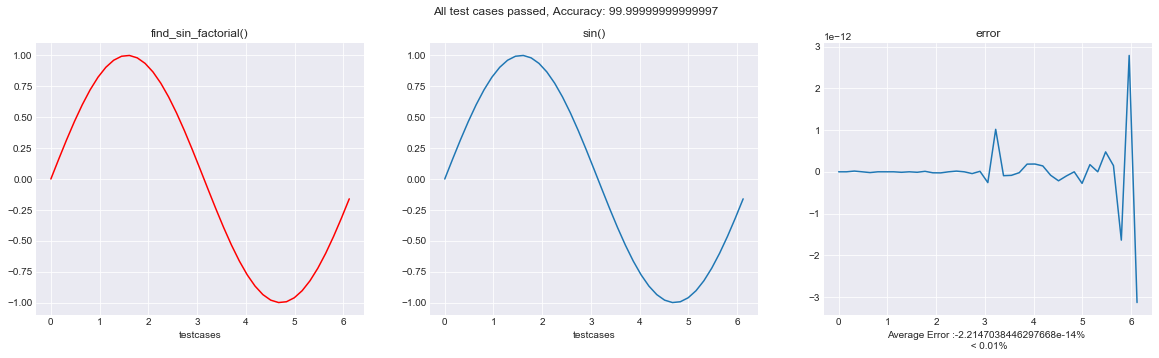

In [165]:
utils.theSeenAndTheUnseenTest( find_sin_factorial, math.sin, np.linspace(0, np.pi*2, 39, False))

In [166]:
cosfactorial_time = utils.find_time(np.linspace(0, np.pi*2, num = 39, endpoint = False), find_cos_factorial)
sinfactorial_time = utils.find_time(np.linspace(0, np.pi*2, num = 39, endpoint = False), find_sin_factorial)

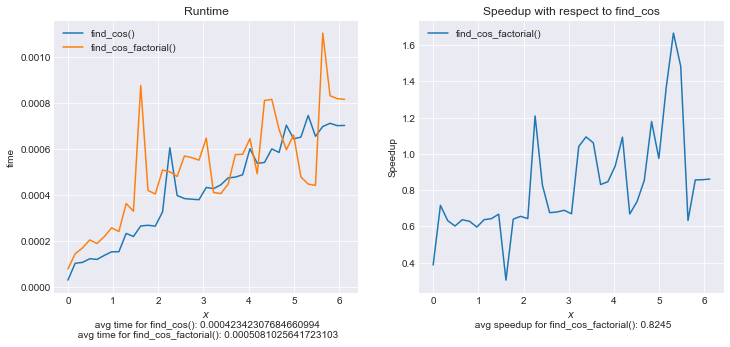

In [167]:
utils.plot_time(np.linspace(0, np.pi*2, num = 39, endpoint = False), True, first = (cosnaive_time, find_cos),
          second = (cosfactorial_time, find_cos_factorial))

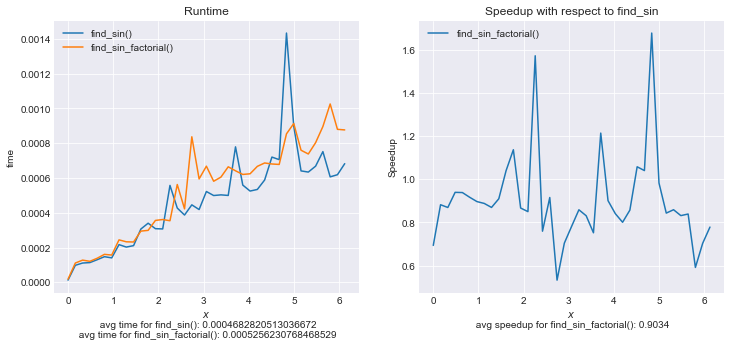

In [168]:
utils.plot_time(np.linspace(0, np.pi*2, num = 39, endpoint = False), True, first = (sinnaive_time, find_sin),
          second = (sinfactorial_time, find_sin_factorial))

| Optimization | Geometric Series   | Speed Up | Exponential | Speedup | Cosine | Speedup | Sine | Speedup|
|------|------|------|------|------|------|------|------|------|
|   Naive  |$13 ms$| - |$1.9ms$| - | $0.5ms$ | - | $0.4ms$ | - |
| Iterations | $100\mu s$ | $100\times$|$0.62ms$|$3\times$| $0.1ms$ | $3\times$ | $0.1ms$ | $3\times$ |
| Calculating Power | $5.9 ms$ | $2\times$|$2ms$ | $1\times$| $0.4ms$ | $1\times$ | $0.3ms$ | $1\times$|
| Calculating Factorial | - | - | $0.4ms$ | $1\times$| $0.5ms$ | $1\times$ | $0.4ms$ | $1\times$|
| Calculation | - | - | $0.4ms$ | $4\times$|
|All optimzations| $61 \mu s$|$200 \times$| $0.12ms$ | $14\times$|

______________________________

## 4. Further Calculation


<br> I will now replace $\frac{a.a.a...}{1.2.3...}$ by 
<br><br>$\frac{k}{i}$<br><br>$(\frac{k}{i})*\frac{k}{i+1}*\frac{k}{i+2}$<br><br>$(\frac{k}{i}*\frac{k}{i+1}*\frac{k}{i+2})*\frac{k}{i+3}*\frac{k}{i+4}$<br><br>$\dots$<br>

![title](img/trig_Calc.png)

In [169]:
def cal_sine_furthercalculation(x,i) :
    t2 = t1 = val = 0
    sign = 1
    fact = 1
    sq = x*x
    n = 0
    
    #initialising to the first according to sine or cos
    if i == 0:
        i = 2
        val = 1
        t1 = term = 1
    if i == 1:
        t2 = term = val = x
        i = 3
    
    while t1 != t2:
#       previous case
#       term = term*sq     
#       fact = fact*i*(i-1)
#       sign  = -sign
#       val = val + (term/fact)*sign

#       optimized case
        term = term*sq/(i*(i-1))*(-1)
        val += term
        i = i + 2
        t2 = t1
        t1 = val
        
    return val, int(i/2)

def find_cos_furthercalculation(x) :
    return cal_sine_furthercalculation(x, 0)
def find_sin_furthercalculation(x) :
    return cal_sine_furthercalculation(x, 1)

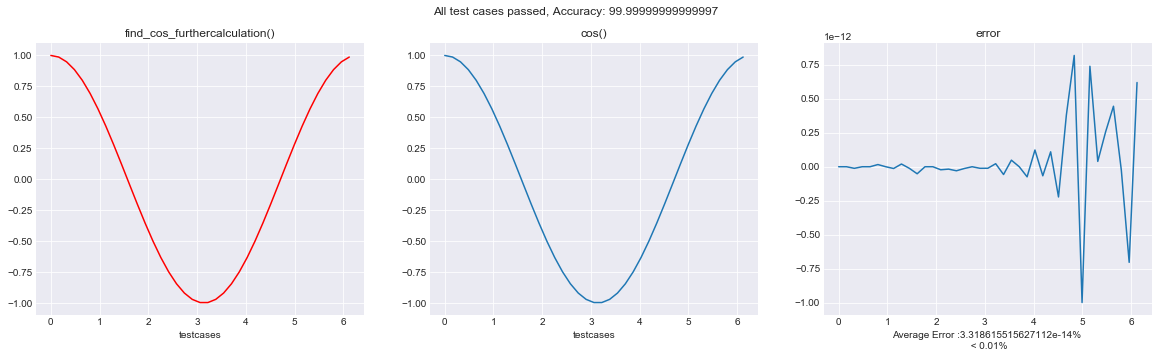

In [170]:
utils.theSeenAndTheUnseenTest( find_cos_furthercalculation, math.cos, np.linspace(0, np.pi*2, 39, False))

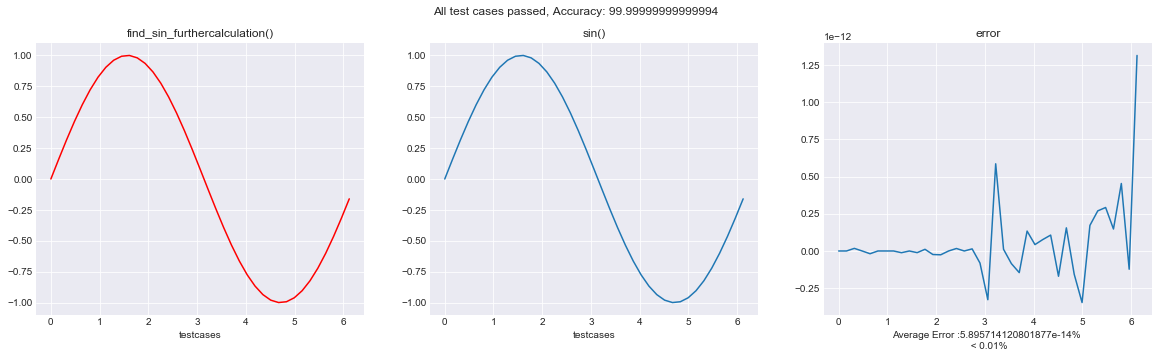

In [171]:
utils.theSeenAndTheUnseenTest( find_sin_furthercalculation, math.sin, np.linspace(0, np.pi*2, 39, False))

In [172]:
cosfurthercalculation_time = utils.find_time(np.linspace(0, np.pi*2, num = 39, endpoint = False), find_cos_furthercalculation)
sinfurthercalculation_time = utils.find_time(np.linspace(0, np.pi*2, num = 39, endpoint = False), find_sin_furthercalculation)

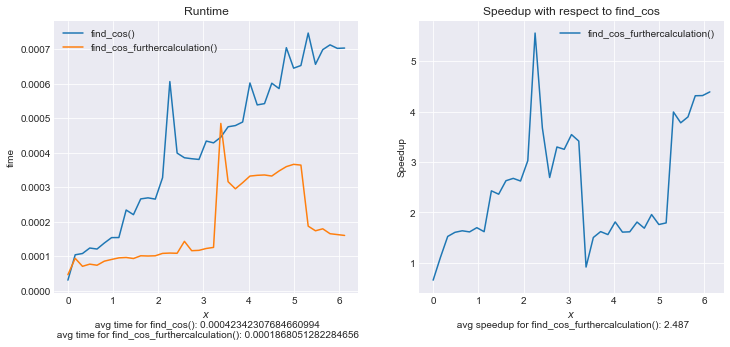

In [173]:
utils.plot_time(np.linspace(0, np.pi*2, num = 39, endpoint = False), True, first = (cosnaive_time, find_cos),
          second = (cosfurthercalculation_time, find_cos_furthercalculation))

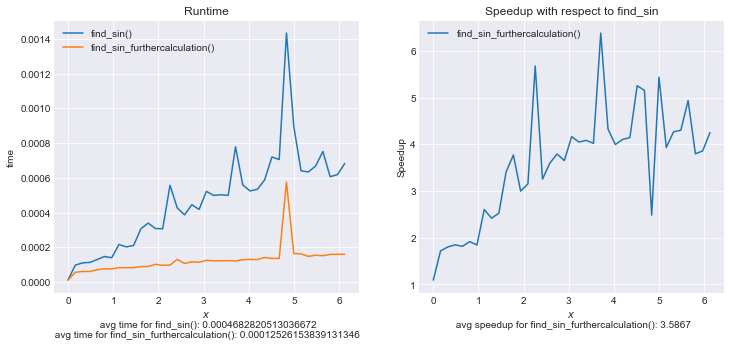

In [174]:
utils.plot_time(np.linspace(0, np.pi*2, num = 39, endpoint = False), True, first = (sinnaive_time, find_sin),
          second = (sinfurthercalculation_time, find_sin_furthercalculation))

| Optimization | Geometric Series   | Speed Up | Exponential | Speedup | Cosine | Speedup | Sine | Speedup|
|------|------|------|------|------|------|------|------|------|
|   Naive  |$13 ms$| - |$1.9ms$| - | $0.5ms$ | - | $0.4ms$ | - |
| Iterations | $100\mu s$ | $100\times$|$0.62ms$|$3\times$| $0.1ms$ | $3\times$ | $0.1ms$ | $3\times$ |
| Calculating Power | $5.9 ms$ | $2\times$|$2ms$ | $1\times$| $0.4ms$ | $1\times$ | $0.3ms$ | $1\times$|
| Calculating Factorial | - | - | $0.4ms$ | $1\times$| $0.5ms$ | $1\times$ | $0.4ms$ | $1\times$|
| Calculation | - | - | $0.4ms$ | $4\times$| $0.1ms$ | $2\times$ | $0.1ms$ | $3\times$
|All optimzations| $61 \mu s$|$200 \times$| $0.12ms$ | $14\times$|

______
## 5. All optimizations

![title](img/exp_all_opts.png)

In [175]:
def cal_sine_cosine_allopts(x,i) :
    
    t1 = val = 0
    error_per = 1
    sign = 1
    fact = 1
    sq = x*x
    
    if i == 0:
        i = 2
        val = 1
        t1 = term = 1
        actual = math.cos(x)
    else:
        t2 = term = val = x
        i = 3
        actual = math.sin(x)
    
    #while t1 != t2:
    while error_per > 0.01:
        sign  = -sign
        val = val + ((x**(i))/math.factorial(i))*sign
        i = i + 2
        if actual != 0:            
            error_per = abs((val - actual)/actual)*100
        else:
            error_per = 0
        t1 = val
    return val, i/2
    
def find_cos_allopts(x) : 
    return cal_sine_cosine_allopts(x,0)
def find_sin_allopts(x) :
    return cal_sine_cosine_allopts(x,1)

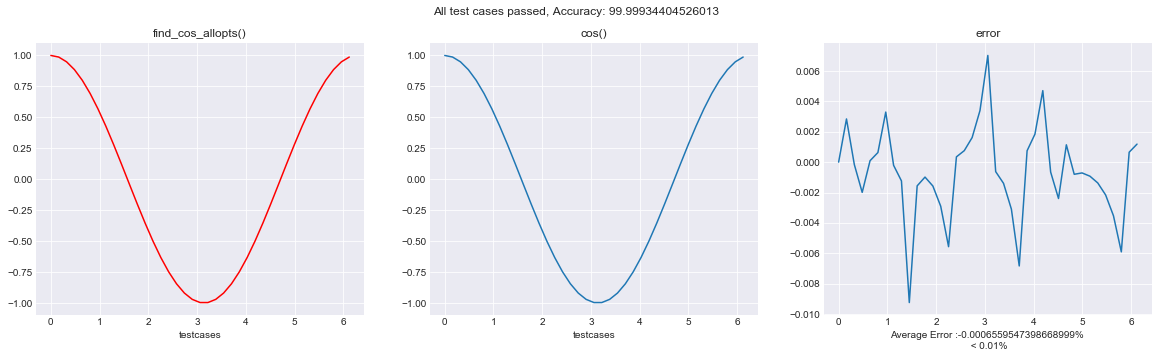

In [176]:
utils.theSeenAndTheUnseenTest( find_cos_allopts, math.cos, np.linspace(0, np.pi*2, 39, False))

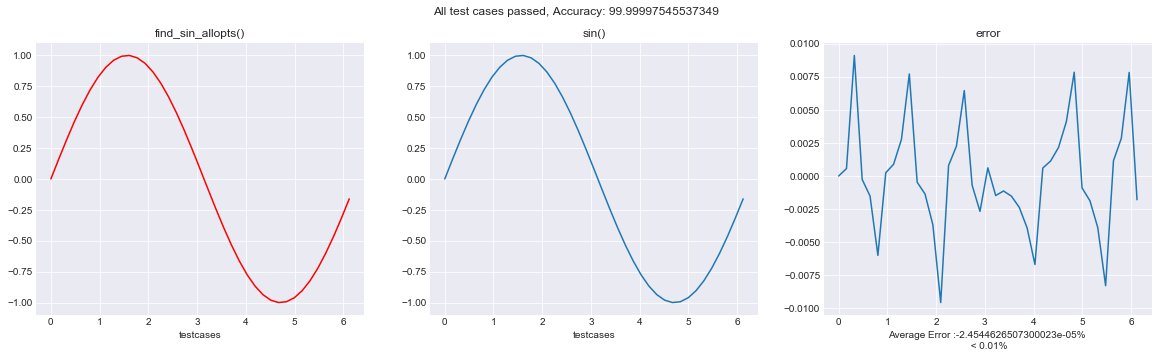

In [177]:
utils.theSeenAndTheUnseenTest( find_sin_allopts, math.sin, np.linspace(0, np.pi*2, 39, False))

In [178]:
cosallopts_time = utils.find_time(np.linspace(0, np.pi*2, num = 39, endpoint = False), find_cos_allopts)
sinallopts_time = utils.find_time(np.linspace(0, np.pi*2, num = 39, endpoint = False), find_sin_allopts)

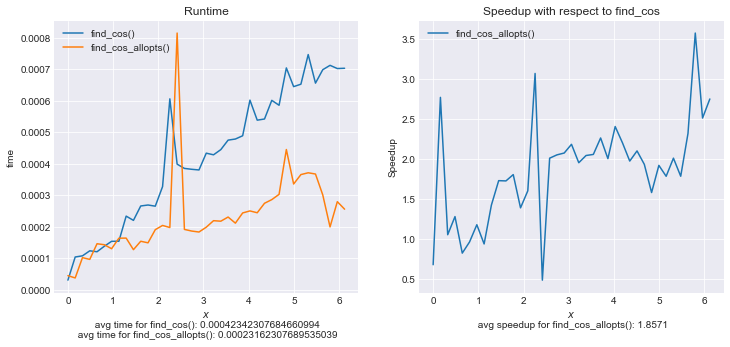

In [179]:
utils.plot_time(np.linspace(0, np.pi*2, num = 39, endpoint = False), True, first = (cosnaive_time, find_cos),
          second = (cosallopts_time, find_cos_allopts))

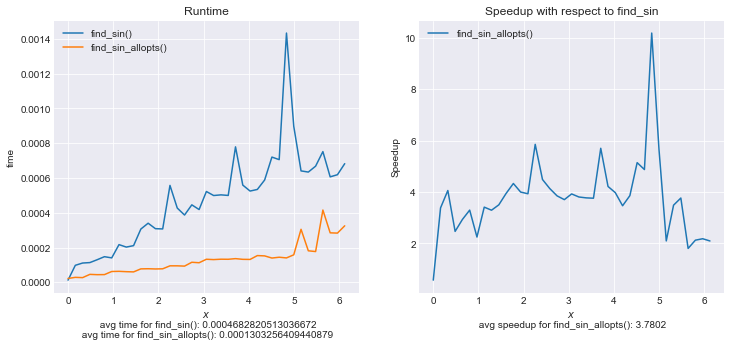

In [180]:
utils.plot_time(np.linspace(0, np.pi*2, num = 39, endpoint = False), True, first = (sinnaive_time, find_sin),
          second = (sinallopts_time, find_sin_allopts))

| Optimization | Geometric Series   | Speed Up | Exponential | Speedup | Cosine | Speedup | Sine | Speedup|
|------|------|------|------|------|------|------|------|------|
|   Naive  |$13 ms$| - |$1.9ms$| - | $0.5ms$ | - | $0.4ms$ | - |
| Iterations | $100\mu s$ | $100\times$|$0.62ms$|$3\times$| $0.1ms$ | $3\times$ | $0.1ms$ | $3\times$ |
| Calculating Power | $5.9 ms$ | $2\times$|$2ms$ | $1\times$| $0.4ms$ | $1\times$ | $0.3ms$ | $1\times$|
| Calculating Factorial | - | - | $0.4ms$ | $1\times$| $0.5ms$ | $1\times$ | $0.4ms$ | $1\times$|
| Calculation | - | - | $0.4ms$ | $4\times$| $0.1ms$ | $2\times$ | $0.1ms$ | $3\times$
|All optimzations| $61 \mu s$|$200 \times$| $0.12ms$ | $14\times$| $0.1ms$ | $2\times$ | $0.1ms$ | $3\times$

______________